# **Labrotary Practice 1**
**TE IT Sem-1**


---


# **Stock Price Prediction Using ML**


---

Batch: **M11**

Group ID: **2**



---


Project Guide:

Ms. Sumitra Jakhete.


---



Group Members:

Maya Mane (33336)

Kiran Parkhe (33350)

Priyanka Ghuge (33361)

Rajesh Chaudhari (33362)


In [ ]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly==5.4.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#for data manuplation, numerical computation & data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for building charts & graphs
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot


#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [ ]:
tesla=pd.read_csv("tesla.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
#converting date column to datetime using pandas library
tesla['Date']=pd.to_datetime(tesla['Date'])
tesla['Date']

0      2010-06-29
1      2010-06-30
2      2010-01-07
3      2010-02-07
4      2010-06-07
          ...    
2188   2019-11-03
2189   2019-12-03
2190   2019-03-13
2191   2019-03-14
2192   2019-03-15
Name: Date, Length: 2193, dtype: datetime64[ns]

In [ ]:
#evaluating the dataset
print(f'Dataset contains stock prices from {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total_days={(tesla.Date.max()-tesla.Date.min()).days} days')

Dataset contains stock prices from 2010-01-07 00:00:00 to 2019-12-03 00:00:00
Total_days=3617 days


In [ ]:
#shows statistical values for each column
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


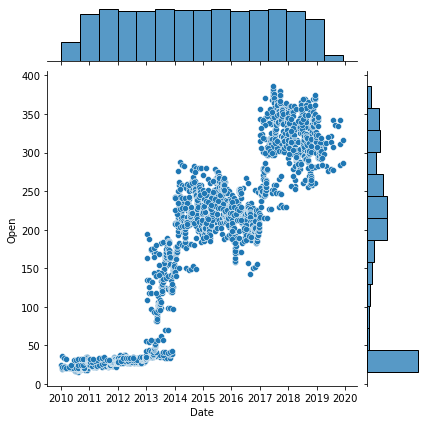

In [ ]:
import seaborn as sns
#Distribution of Open price and date using scatter plot
sns.jointplot(x = tesla['Date'], y = tesla['Open'], kind = 'scatter')

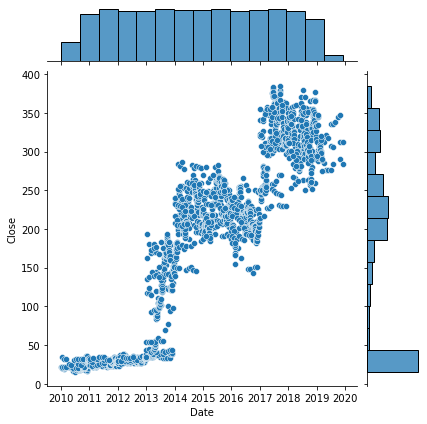

In [ ]:
import seaborn as sns
#Distribution of Close price and date using scatter plot
sns.jointplot(x = tesla['Date'], y = tesla['Close'], kind = 'scatter')

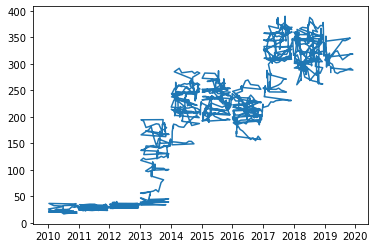

In [ ]:
plt.plot(tesla['Date'],tesla['High'])

In [ ]:
sns.barplot(x = tesla['Date'], y = tesla['Low'])

<AxesSubplot:xlabel='Date', ylabel='Low'>

In [ ]:
sns.lineplot(data=tesla, x="Date", y="Adj Close")

In [ ]:
#creating a box plot A Box Plot is the visual representation of the statistical values
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
#setting layout for plot

layout=go.Layout(
    title='Stock Price of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data=[{'x':tesla['Date'], 'y':tesla['Close']}]
plot=go.Figure(data=tesla_data, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
#building the regression model
from sklearn.model_selection import train_test_split

#for prepossing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#split the data into train and test 
x=np.array(tesla.index).reshape(-1,1)
x

In [ ]:
y=tesla['Close']
y

In [ ]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
#feature scaling
scaler=StandardScaler().fit(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a Linear Regression Model
lm=LinearRegression()
lm.fit(x_train,y_train)

In [ ]:
#plot actual and predicted values for dataset
trace0=go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)

trace1=go.Scatter(
    x=x_train.T[0],
    y=lm.predict(x_train).T,
    mode='lines',
    name='Predicted'
)

tesla_data=[trace0,trace1]

layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data, layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
#calculating score for model evaluation
print('====================================================')
print("R2_SCORE(Train)::",r2_score(y_train,lm.predict(x_train)))
print("R2_SCORE(Test)::",r2_score(y_test,lm.predict(x_test)))
print('====================================================')
print("MSE(Train)::",mse(y_train,lm.predict(x_train)))
print("MSE(Test)::",mse(y_test,lm.predict(x_test)))
print('====================================================')
